PLCA implementation

In [1]:
def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)+1e-100
    return (X-mean)/std, mean, std


In [66]:
import numpy as np
import pandas as pd
train_df = pd.read_csv('mnist_train.csv')
train_df_array = train_df.values
test_df = pd.read_csv('mnist_test.csv')
test_df_array = test_df.values

X_train = train_df_array[:, 1:]
y_train = train_df_array[:, 0]
X_test = test_df_array[:, 1:]
y_test = test_df_array[:, 0]

# X_train, train_mean, train_std = normalize(X_train)
# X_test, test_mean, test_std = normalize(X_test)

def K_plca(y, K):
    counts=[0 for k in range(10)]
    indices=[]
    for i in range(len(y)):
        if counts[y[i]]>=K : continue
        indices.append(i)
        counts[y[i]]+=1
    return indices

indices = K_plca(y_train, 100)
train_batch = X_train[indices, :].T
corresponding_digits = y_train[indices]

PLCA

In [72]:
def update_Px_zbyy(X, Z, Y, Px_zbyy, Px_z, P_ybyz) :
#     print(X,Z,Y)
    for x in range(X):
        for y in range(Y):
            for z in range(Z):
                numerator = Px_z[x, z]*P_ybyz[z, y]
                denominator = np.dot(Px_z[x, :], P_ybyz[:, y])
                if(denominator==0) : Px_zbyy[x, y, z] = 0
                else : Px_zbyy[x, y, z] = numerator/denominator
    return Px_zbyy

def update_Px_z(X, Z, Px_z, Px_zbyy, Ixy) :
    for x in range(X):
        for z in range(Z):
            denominator=0
            for z1 in range(Z):
                if z1==z : numerator = np.dot(Ixy[:, x], Px_zbyy[x, :, z])
                denominator += np.dot(Ixy[:, x], Px_zbyy[x, :, z1])
            if(denominator) : Px_z[x, z] = numerator/denominator
            else : Px_z[x, z]=0
    return Px_z

def update_P_ybyz(Z, Y, P_ybyz, Px_zbyy, Ixy) :
    for z in range(Z):
        for y in range(Y):
            denominator=0
            for y1 in range(Y):
                if y1==y : numerator =  np.dot(Ixy[y, :], Px_zbyy[:, y, z])
                denominator += np.dot(Ixy[y1, :], Px_zbyy[:, y1, z])
            if(denominator) : P_ybyz[z, y] = numerator/denominator
            else :  P_ybyz[z, y]=0
    return P_ybyz

def fit(Ixy, Z=3, iterations=1000, threshold=1e-3) :
    X = Ixy.shape[1]
    Y = Ixy.shape[0]    

    Px_z = np.random.uniform(low=0.1, high=0.9, size=(X, Z))
    Px_zbyy = np.random.uniform(low=0.1, high=0.9, size=(X, Y, Z))
    P_ybyz = np.random.uniform(low=0.1, high=0.9, size=(Z, Y))
    
    for iteration in range(int(iterations)) :
        print(iteration)
        initial_Px_z = np.copy(Px_z)
        initial_P_ybyz = np.copy(P_ybyz)
        initial_Px_zbyy = np.copy(Px_zbyy)
        # update
        Px_zbyy = update_Px_zbyy(X, Z, Y, Px_zbyy, Px_z, P_ybyz)
        Px_z = update_Px_z(X, Z, Px_z, Px_zbyy, Ixy)
        P_ybyz = update_P_ybyz(Z, Y, P_ybyz, Px_zbyy, Ixy)
        # compare
        if np.linalg.norm(abs(Px_zbyy-initial_Px_zbyy))>threshold : continue
        elif np.linalg.norm(abs(Px_z-initial_Px_z))>threshold : continue
        elif np.linalg.norm(abs(P_ybyz-initial_P_ybyz))>threshold : continue
        else : 
            break
    return Px_z, Px_zbyy, P_ybyz

K = 3

In [73]:
# np.random.seed(10)
Px_z, Px_zbyy, P_ybyz = fit(train_batch, 3 ,30, 1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


Transformed Data

Total points are 100

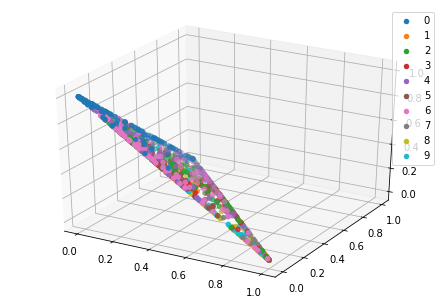

In [75]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
figure = plt.figure()
axes = Axes3D(figure)
for digit in np.unique(corresponding_digits):
    index = np.where(corresponding_digits == digit)
    axes.scatter(Px_z[index][:,0], Px_z[index][:,1], Px_z[index][:,2], label=digit)
# plt.xlim(-1, 1)
# plt.ylim(-1, 1)
axes.legend()
plt.show()

Bases Vectors

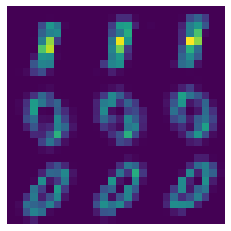

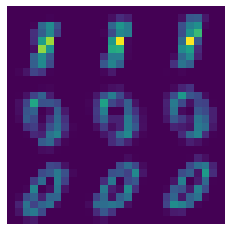

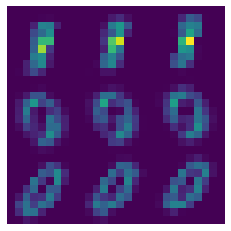

In [76]:
sq_dim = int(np.sqrt(P_ybyz.shape[1]))
channels = P_ybyz.shape[0]
reshaped_basis = np.reshape(P_ybyz, (sq_dim, sq_dim, channels))
for k in range(P_ybyz.shape[0]):
    plt.imshow(reshaped_basis[:, :, k])
    plt.axis('off')
    plt.show()

Reconstructed Images

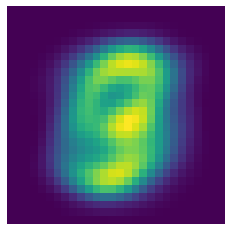

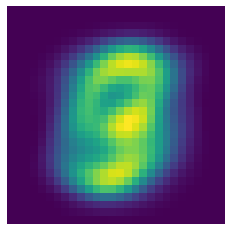

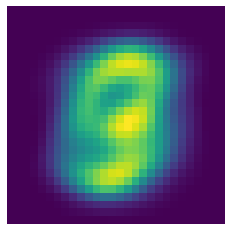

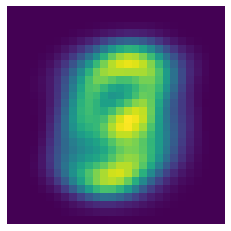

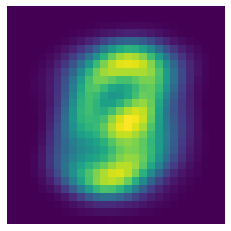

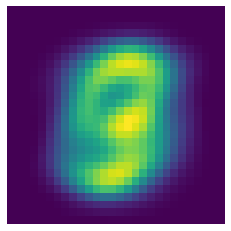

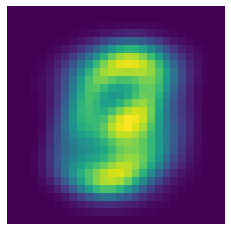

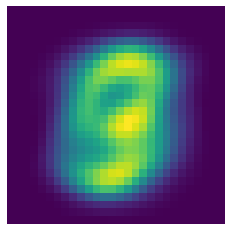

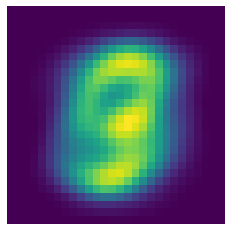

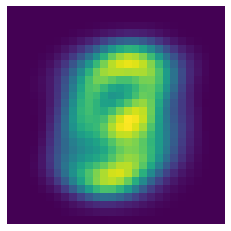

In [77]:
indices = K_plca(corresponding_digits, 1)
for index in indices:
    Px_z_index = np.reshape(Px_z[index], [1]+list(Px_z[index].shape))
    reconstructed_vector = np.dot(Px_z_index, P_ybyz)
    unnormalized_vector = reconstructed_vector*(train_std+1e-100) + train_mean
    side_length = int(np.sqrt(P_ybyz.shape[1]))
    reconstructed_array = np.reshape(unnormalized_vector, (side_length, side_length))
    plt.imshow(reconstructed_array)
    plt.axis('off')
    plt.show()   

K = 2

In [78]:
np.random.seed(10)
Px_z, Px_zbyy, P_ybyz = fit(train_batch, 2,30, 1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


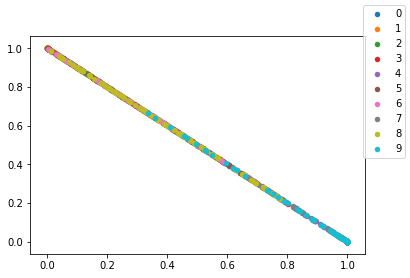

In [79]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
figure = plt.figure()
for digit in np.unique(corresponding_digits):
    index = np.where(corresponding_digits == digit)
    plt.scatter(Px_z[index][:,0], Px_z[index][:,1], label=digit, s=20)
figure.legend()
plt.show()

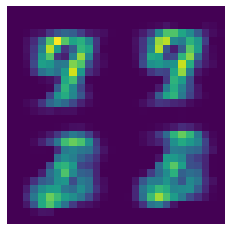

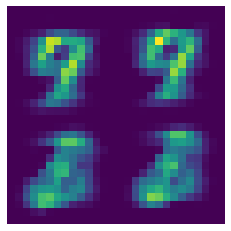

In [80]:
sq_dim = int(np.sqrt(P_ybyz.shape[1]))
channels = P_ybyz.shape[0]
reshaped_basis = np.reshape(P_ybyz, (sq_dim, sq_dim, channels))
for k in range(P_ybyz.shape[0]):
    plt.imshow(reshaped_basis[:, :, k])
    plt.axis('off')
    plt.show()

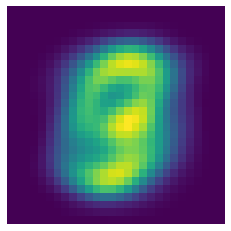

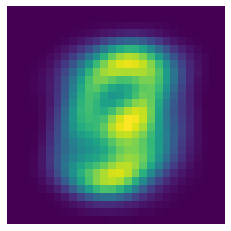

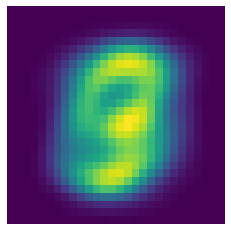

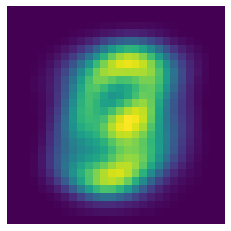

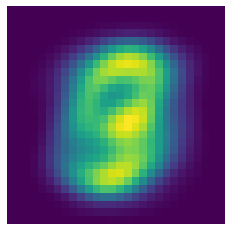

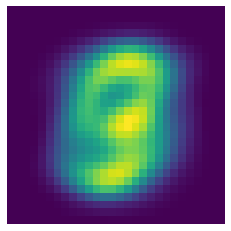

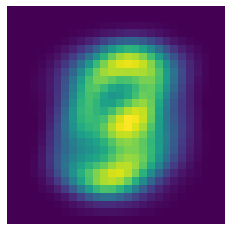

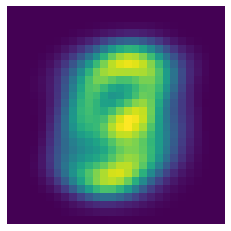

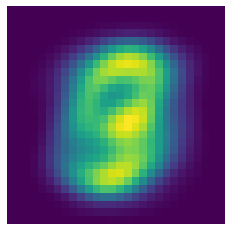

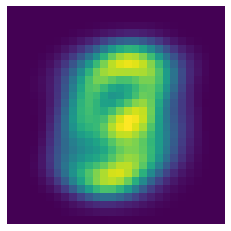

In [81]:
indices = K_plca(corresponding_digits, 1)
for index in indices:
    Px_z_index = np.reshape(Px_z[index], [1]+list(Px_z[index].shape))
    reconstructed_vector = np.dot(Px_z_index, P_ybyz)
    unnormalized_vector = reconstructed_vector*(train_std+1e-100) + train_mean
    side_length = int(np.sqrt(P_ybyz.shape[1]))
    reconstructed_array = np.reshape(unnormalized_vector, (side_length, side_length))
    plt.imshow(reconstructed_array)
    plt.axis('off')
    plt.show()   

reference: https://github.com/Aaditya-Singh/Music-Source-Separation/blob/master/UGP.ipynb